## Deep Learing Regressor 

In [2]:
## load packages 
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
import os

## Get the current working directory
cwd = os.getcwd()

## Print the current working directory
print("Current working directory: {0}".format(cwd))

Current working directory: /Users/daanroosendaal/Desktop/UT/Master/Thesis/Code/DNN-model


In [3]:
## load Cleaned Dataferame 
df = pd.read_csv("/Your/Directory/Here/MLR_COVID.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8261 entries, 0 to 8260
Data columns (total 57 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               8261 non-null   int64  
 1   street                   8261 non-null   object 
 2   zipcode                  8261 non-null   object 
 3   City                     8261 non-null   object 
 4   price                    8261 non-null   float64
 5   PublishedDate            8261 non-null   object 
 6   buildKind                8261 non-null   object 
 7   ConstructionYear         8261 non-null   object 
 8   LivingArea               8261 non-null   int64  
 9   LotArea                  8261 non-null   int64  
 10  Volume                   8261 non-null   int64  
 11  Rooms                    8261 non-null   int64  
 12  Bedrooms                 8261 non-null   int64  
 13  Bathrooms                8261 non-null   int64  
 14  EnergyLable             

## Additional Cleaning

In [ ]:
## outlier checks


In [4]:
## split datetime into multiple columns
df['date'] = pd.to_datetime(df['PublishedDate'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

## inspect date columns 
print(df.year.value_counts()) ## delete all years below 2020

2021    7594
2020     667
Name: year, dtype: int64


In [5]:
## delete some years
df = df[(df.year > 2019)]

## Explainatory Data Analysis (EDA)

/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


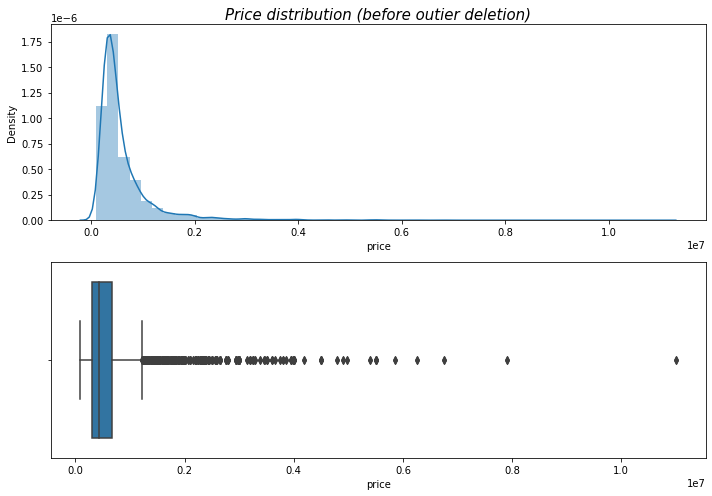

In [250]:
## Take a look at the target variable (Price)
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
plt.title("Price distribution (before outier deletion)", fontsize=15, style = 'italic')
sns.distplot(df['price'])
fig.add_subplot(2,1,2)
sns.boxplot(df['price'])
plt.tight_layout() 
## price looks to be skewed 

## save image
plt.savefig('Price distribution (before outier deletion).png', dpi=300, bbox_inches='tight')

In [6]:
## Adjust price column to a more normal distribution
## function for removal
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


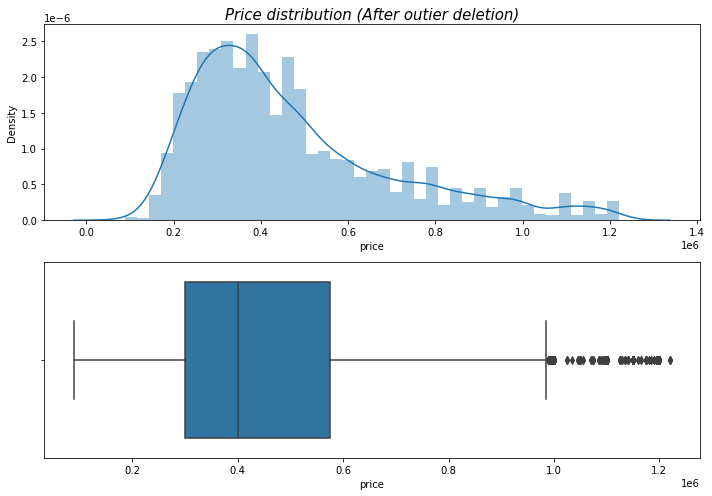

In [7]:
## remove outliers out price column
df_outlier_removed=remove_outlier_IQR(df.price)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=df.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=df.drop([ind_diff[i]])
    df=df_final

## check distibution of price again
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
plt.title("Price distribution (After outier deletion)", fontsize=15, style = 'italic')
sns.distplot(df['price'])
fig.add_subplot(2,1,2)
sns.boxplot(df['price'])
plt.tight_layout()

## save image
plt.savefig('Price distribution (After outier deletion.png', dpi=300, bbox_inches='tight')

MinYear: 2020 MaxYear: 2021


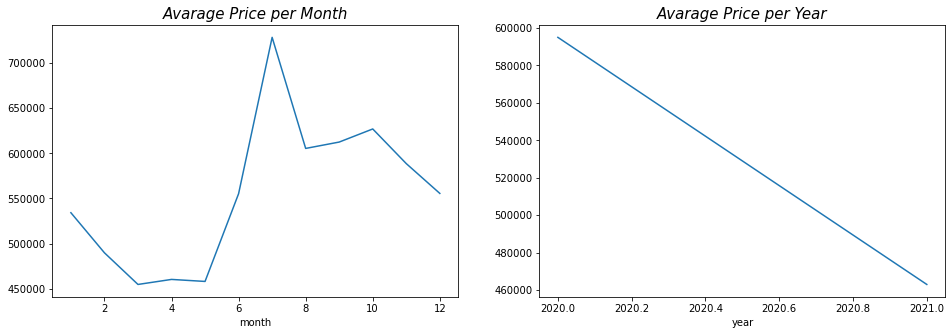

In [8]:
## visualise price change per year and month 

## plot mean price differences per month and year 
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
df.groupby('month').mean()['price'].plot()
plt.title("Avarage Price per Month", fontsize=15, style = 'italic')
fig.add_subplot(1,2,2)
plt.title("Avarage Price per Year", fontsize=15, style = 'italic')
df.groupby('year').mean()['price'].plot()

print("MinYear:", min(df['year']), "MaxYear:", max(df['year']))

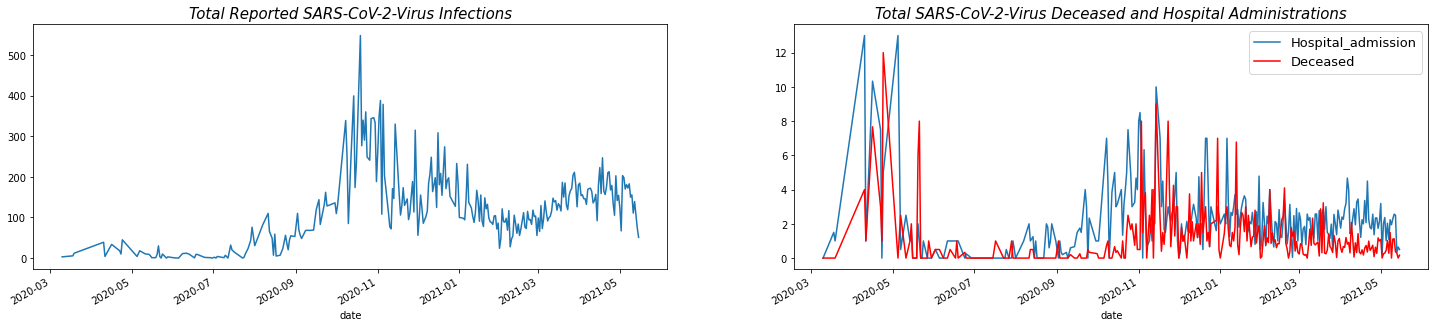

In [258]:
## visualise COVID Infections change per year and month 

## plot mean price differences per month and year 
fig = plt.figure(figsize=(25,5))
fig.add_subplot(1,2,1)
plt.title("Total Reported SARS-CoV-2-Virus Infections", fontsize=15, style = 'italic')
df.groupby('date').mean()['Total_reported'].plot()
fig.add_subplot(1,2,2)
plt.title("Total SARS-CoV-2-Virus Deceased and Hospital Administrations", fontsize=15, style = 'italic')
df.groupby('date').mean()['Hospital_admission'].plot()
df.groupby('date').mean()['Deceased'].plot(color = 'red')
plt.legend(loc = 'upper right', fontsize = 13)

## save image
plt.savefig('COVID_19 Reports.png', dpi=300, bbox_inches='tight')

Index(['Unnamed: 0', 'street', 'zipcode', 'City', 'price', 'PublishedDate',
       'buildKind', 'ConstructionYear', 'LivingArea', 'LotArea', 'Volume',
       'Rooms', 'Bedrooms', 'Bathrooms', 'EnergyLable', 'Garden', 'GardenArea',
       'Depth', 'Width', 'GardenAim', 'Storage', 'ExStor_TOT', 'PricePerM2',
       'CityAmersfoort', 'CityAmsterdam', 'CityDen.Bosch', 'CityDen.Haag',
       'CityEindhoven', 'CityGroningen', 'CityHaarlem', 'CityMiddelburg',
       'CityRotterdam', 'CityTilburg', 'CityUtrecht', 'CityZwolle',
       'buildKindBestaande.bouw', 'buildKindNieuwbouw', 'EnergyLableA',
       'EnergyLableB', 'EnergyLableC', 'EnergyLableD', 'EnergyLableE',
       'EnergyLableF', 'EnergyLableG', 'Gardengarden', 'Gardenpatio',
       'Gardenterras.balkon', 'GardenAimEast', 'GardenAimNorth',
       'GardenAimOther', 'GardenAimSouth', 'GardenAimWest', 'Storageindoor',
       'Storageoutdoor', 'Total_reported', 'Hospital_admission', 'Deceased',
       'date', 'month', 'year'],
      dtyp

## Data Preperation

In [8]:
## Create seperated dataframes with and without COVID-19 features

## Dataframe Without COVID-19 features
df1 = df.drop(columns = ["Unnamed: 0", "Total_reported", "Hospital_admission", "Deceased", 
                         "street", "zipcode", "City", "PublishedDate", 
                         "buildKind", "ConstructionYear", "EnergyLable", 
                         "GardenAim", "Garden", "Storage" ,"date"])

## Dataframe with COVID-19 features
df_C = df.drop(columns = ["Unnamed: 0","street", "zipcode", "City",
                          "PublishedDate", "buildKind", "ConstructionYear",
                          "EnergyLable", "GardenAim", "Garden", "Storage" ,"date"])

In [263]:
## Check the correlation with heatmap 
corrmat = df_C.corr()
#f, ax = plt.subplots(figsize=(20, 20))
#sns.heatmap(corrmat, square=True);

# , vmax=.8, vmin=-0.8

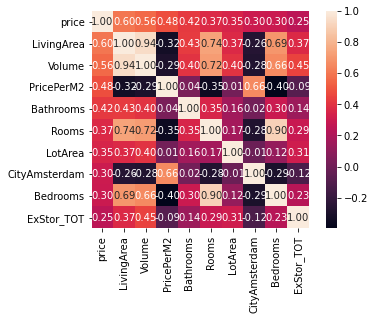

In [260]:
k=10
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df_C[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [9]:
## Split datasets into train- and Test-set (80%, 20% respectively)

## Train/Test split on normal dataset
X = df1.drop('price',axis =1).values
y = df1['price'].values
## make split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=221094)

## Train/Test split on COVID-19 dataset
X_c = df_C.drop('price', axis =1).values
y_c = df_C['price'].values

## make split Train Test(20% - 80% respectively)
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_c, y_c, test_size=0.20, random_state=221094)

In [10]:
## Normalize the datasets seperately

## Set scaler
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()

## Scale the data
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))
X_c_train = s_scaler.fit_transform(X_c_train.astype(np.float))
X_c_test = s_scaler.transform(X_c_test.astype(np.float))

## Phase 1: Multiple Linear Regression

#### Model 1: MLR regression without COVID-19 featurs

In [47]:
## Multiple Liner Regression (Non-COVID feautures only)
np.random.seed(2021)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

## return interceot and slope
print(regressor.intercept_)
print(regressor.coef_)

471960.5407743555
[ 2.17558140e+05  1.25613171e+04 -3.09891528e+04 -4.88427618e+03
  7.00119464e+03  7.86847088e+03 -1.94905707e+03 -1.58340066e+03
 -2.45134609e+03  1.91039128e+03  1.63412207e+05 -1.18180555e+17
 -3.09391894e+17  4.22606405e+15 -8.96857589e+15 -1.37783178e+17
 -1.26964426e+17 -1.28770222e+17 -5.93051830e+16 -2.29347559e+17
 -1.46306110e+17 -1.54055099e+17 -9.04711381e+16 -2.64796429e+17
 -2.64796429e+17 -3.29422149e+03 -6.03089720e+03 -6.13483058e+03
 -5.97791871e+03 -3.28721807e+03  5.53061976e+01 -6.29744093e+03
  3.25933525e+03  4.96760656e+03  6.75200258e+03  2.80292432e+03
  3.40600759e+03  3.74392311e+03  3.81005128e+03  2.19303647e+03
  8.63662365e+02 -4.57854735e+02  1.05719844e+03  1.30014232e+03]


In [48]:
## Make prediction (Non-COVID features only)
y_pred_MLR = regressor.predict(X_test)

In [49]:
## Check MLR Results 
MLR_coefs = pd.DataFrame(regressor.coef_, df1.drop('price',axis =1).columns, columns=['Coefficient']) 
MLR_coefs

,Coefficient
LivingArea,2.175581e+05
LotArea,1.256132e+04
Volume,-3.098915e+04
Rooms,-4.884276e+03
Bedrooms,7.001195e+03
Bathrooms,7.868471e+03
GardenArea,-1.949057e+03
Depth,-1.583401e+03
Width,-2.451346e+03
ExStor_TOT,1.910391e+03


In [50]:
#compare actual output values with predicted values
MLR1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_MLR})

# evaluate the performance of the algorithm (MAE - MSE - RMSE - R2)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_MLR))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred_MLR))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_MLR)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred_MLR))

MLR1.head(10)

MAE: 50031.21292372245
MSE: 7536764911.919893
RMSE: 86814.54320515598
VarScore: 0.856600458407567


,Actual,Predicted
0,300000.0,302616.540774
1,995000.0,867736.540774
2,819000.0,888696.540774
3,272000.0,235416.540774
4,459500.0,508184.540774
5,850000.0,755832.540774
6,350000.0,455896.540774
7,795000.0,765976.540774
8,309000.0,303128.540774
9,335000.0,331896.540774


In [51]:
print('Miltiple Linear Regression Model1:')
print("Train Score {:.2f}".format(regressor.score(X_train,y_train)))
print("Test Score {:.2f}".format(regressor.score(X_test, y_test)))

Miltiple Linear Regression Model1:
Train Score 0.89
Test Score 0.86


/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


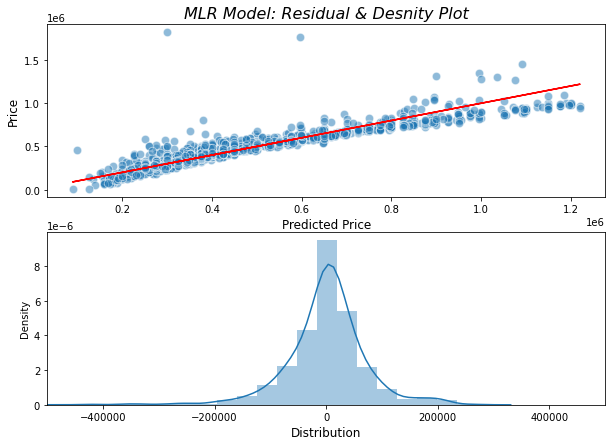

In [226]:
## Sanity checking model predictions
fig = plt.figure(figsize=(10,7))
## scatterplot 
fig.add_subplot(2,1,1)
plt.title('MLR Model: Residual & Desnity Plot', fontsize=16, style = 'italic')
plt.scatter(y_test,y_pred_MLR, alpha=.5, s=70, edgecolor = 'white')
plt.xlabel('Predicted Price', fontsize = 12)
plt.ylabel('Price', fontsize = 12)
# Perfect predictions
plt.plot(y_test,y_test,'r')

## densityplot
fig.add_subplot(2,1,2)
residuals = (y_test- y_pred_MLR)
sns.distplot(residuals)
plt.xlabel('Distribution', fontsize = 12)
plt.xlim([-500000, 500000])

## save image
plt.savefig('MLR Model: Residual & Desnity Plot.png', dpi=300, bbox_inches='tight')

/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


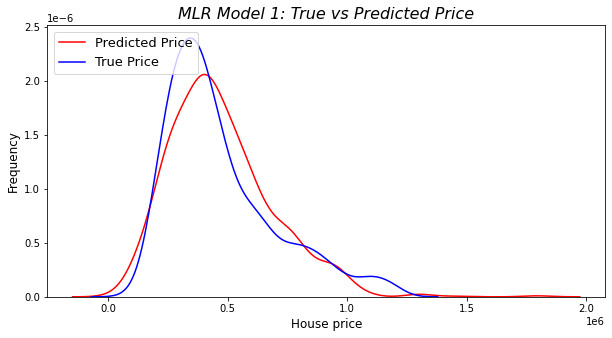

In [227]:
## Visualise True values versus Predicted Values 
fig = plt.figure(figsize=(10,5))
sns.distplot(y_pred_MLR, hist = False, color = 'r', label = 'Predicted Price')
sns.distplot(y_test, hist = False, color = 'b', label = 'True Price')
plt.title('MLR Model 1: True vs Predicted Price', fontsize = 16, style = 'italic')
plt.xlabel('House price', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

## save image
plt.savefig('MLR Model 1: True vs Predicted Price.png', dpi=300, bbox_inches='tight')

#### Model 1: MLR regression with added COVID-19 features

In [54]:
## Same regression but with added COVID-19 features
np.random.seed(2021)

regressor = LinearRegression()  
regressor.fit(X_c_train, y_c_train)

LinearRegression()

In [55]:
y_pred_MLR_C19 = regressor.predict(X_c_test)

In [57]:
MLR_C19_coefs = pd.DataFrame(regressor.coef_, df_C.drop('price',axis =1).columns, columns=['Coefficient']) 
MLR_C19_coefs

,Coefficient
LivingArea,2.177757e+05
LotArea,1.255484e+04
Volume,-3.121541e+04
Rooms,-4.845544e+03
Bedrooms,7.015068e+03
Bathrooms,8.090847e+03
GardenArea,-1.812916e+03
Depth,-1.416809e+03
Width,-2.588744e+03
ExStor_TOT,1.779457e+03


In [58]:
MLR_C19 = pd.DataFrame({'Actual_Price': y_c_test, 'Predicted_Price': y_pred_MLR_C19})

# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_c_test, y_pred_MLR_C19))  
print('MSE:', metrics.mean_squared_error(y_c_test, y_pred_MLR_C19))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_c_test, y_pred_MLR_C19)))
print('VarScore:',metrics.explained_variance_score(y_c_test,y_pred_MLR_C19))

MLR_C19.head(10) 

MAE: 50042.45132287074
MSE: 7541301986.35468
RMSE: 86840.670116914
VarScore: 0.8565147552036291


,Actual_Price,Predicted_Price
0,300000.0,302528.150883
1,995000.0,867520.150883
2,819000.0,889088.150883
3,272000.0,235840.150883
4,459500.0,507168.150883
5,850000.0,754592.150883
6,350000.0,455936.150883
7,795000.0,766720.150883
8,309000.0,303808.150883
9,335000.0,331456.150883


In [59]:
print('Miltiple Linear Regression Model1 (With COVID-19):')
print("Train Score {:.2f}".format(regressor.score(X_c_train, y_c_train)))
print("Test Score {:.2f}".format(regressor.score(X_c_test, y_c_test)))

Miltiple Linear Regression Model1 (With COVID-19):
Train Score 0.89
Test Score 0.86


In [60]:
## conduct a T-test to look for significant difference  
import scipy.stats as stats
print(y_pred_MLR.mean())
print(y_pred_MLR_C19.mean())

stats.ttest_1samp(a = y_pred_MLR, popmean = y_pred_MLR_C19.mean())

471557.59507899126
471579.8912806715


Ttest_1sampResult(statistic=-0.003991474518561518, pvalue=0.9968158001472809)

/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


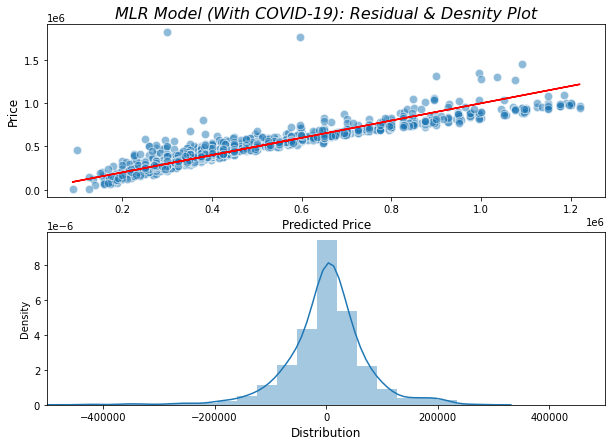

In [228]:
## Sanity checking model predictions
fig = plt.figure(figsize=(10,7))
## scatterplot 
fig.add_subplot(2,1,1)
plt.title('MLR Model (With COVID-19): Residual & Desnity Plot', fontsize=16, style = 'italic')
plt.scatter(y_c_test, y_pred_MLR_C19, alpha=.5, s=70, edgecolor = 'white')
plt.xlabel('Predicted Price', fontsize = 12)
plt.ylabel('Price', fontsize = 12)
# Perfect predictions
plt.plot(y_c_test,y_c_test,'r')

## densityplot
fig.add_subplot(2,1,2)
residuals = (y_c_test - y_pred_MLR_C19)
sns.distplot(residuals)
plt.xlabel('Distribution', fontsize = 12)
plt.xlim([-500000, 500000])

## save image
plt.savefig('MLR Model (With COVID-19): Residual & Desnity Plot.png', dpi=300, bbox_inches='tight')

/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


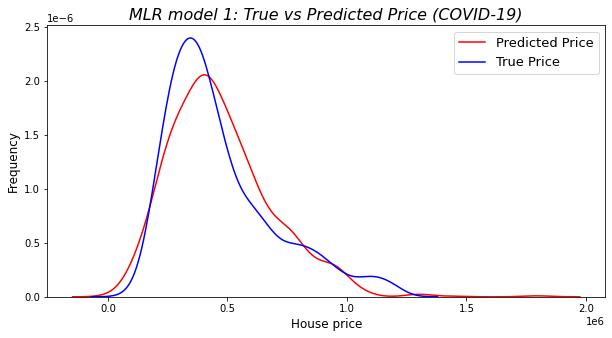

In [229]:
## Visualise True values versus Predicted Values (With COVID-19)
fig = plt.figure(figsize=(10,5))
sns.distplot(y_pred_MLR_C19, hist = False, color = 'r', label = 'Predicted Price')
sns.distplot(y_c_test, hist = False, color = 'b', label = 'True Price')
plt.title('MLR model 1: True vs Predicted Price (COVID-19)', fontsize = 16, style='italic')
plt.xlabel('House price', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 13)

## save image
plt.savefig('MLR model 1: True vs Predicted Price (COVID-19).png', dpi=300, bbox_inches='tight')

## Phase 2: Keras Regression

In [11]:
## Load required functions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

#### Model1: Baseline model

In [12]:
## create Baseline model

## set seed for weights initializagtion 
np.random.seed(2021)

## Build ML model
model = Sequential()

model.add(Dense(45,activation='relu'))
model.add(Dense(45,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='Adam',
              loss='mse')


In [13]:
## fit the model
model.fit(x=X_train, y=y_train,
          validation_data=(X_test,y_test),
          verbose=True,
          batch_size=5,
          epochs=200)

model.summary()

Epoch 1/200
1208/1208 [==============================] - 1s 726us/step - loss: 270443216896.0000 - val_loss: 247651860480.0000
Epoch 2/200
1208/1208 [==============================] - 1s 648us/step - loss: 198156582912.0000 - val_loss: 136967094272.0000
Epoch 3/200
1208/1208 [==============================] - 1s 627us/step - loss: 87653572608.0000 - val_loss: 50787426304.0000
Epoch 4/200
1208/1208 [==============================] - 1s 647us/step - loss: 39552413696.0000 - val_loss: 31648004096.0000
Epoch 5/200
1208/1208 [==============================] - 1s 650us/step - loss: 29812396032.0000 - val_loss: 26107578368.0000
Epoch 6/200
1208/1208 [==============================] - 1s 651us/step - loss: 24648941568.0000 - val_loss: 22026498048.0000
Epoch 7/200
1208/1208 [==============================] - 1s 650us/step - loss: 20587964416.0000 - val_loss: 18944352256.0000
Epoch 8/200
1208/1208 [==============================] - 1s 647us/step - loss: 17441515520.0000 - val_loss: 16550664192.0

<AxesSubplot:title={'center':'Model 1: Loss vs. Validation Loss'}>

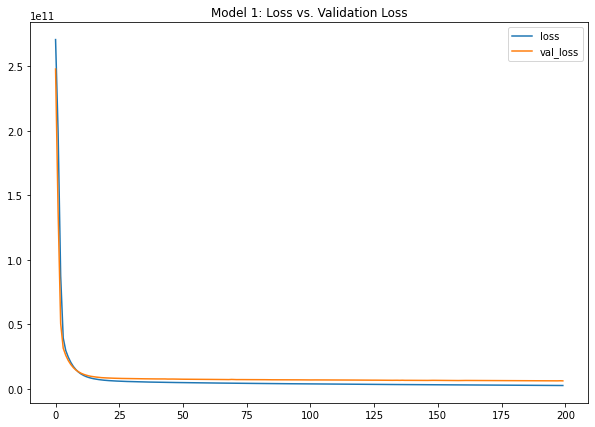

In [14]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(10,7), title = 'Model 1: Loss vs. Validation Loss')

In [89]:
y_pred = model.predict(X_test)

In [90]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred)))

Mean Absolute Error: 31241.99
Mean Squared Error: 5607451807.23
Root Mean Squared Error: 74882.92
Variance score is: 0.89


/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


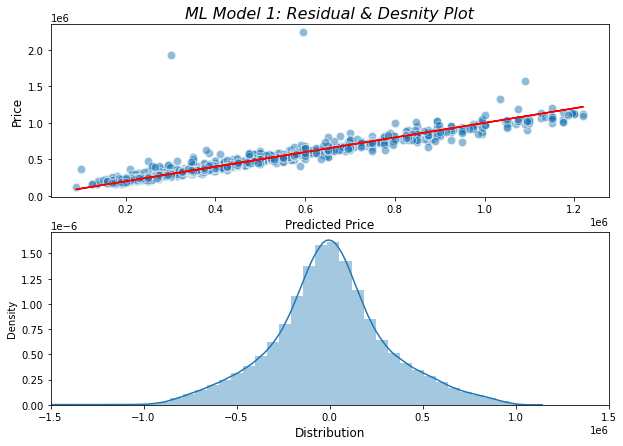

In [230]:
## Sanity checking model predictions
fig = plt.figure(figsize=(10,7))
## scatterplot 
fig.add_subplot(2,1,1)
plt.title('NN Model 1: Residual & Desnity Plot', fontsize=16, style = 'italic')
plt.scatter(y_test, y_pred, alpha=.5, s=70, edgecolor = 'white')
plt.xlabel('Predicted Price', fontsize = 12)
plt.ylabel('Price', fontsize = 12)
# Perfect predictions
plt.plot(y_test,y_test,'r')

## densityplot
fig.add_subplot(2,1,2)
residuals = (y_test - y_pred)
sns.distplot(residuals)
plt.xlabel('Distribution', fontsize = 12)
plt.xlim([-1500000, 1500000])

## save image
plt.savefig('MML Model 1: Residual & Desnity Plot.png', dpi=300, bbox_inches='tight')

/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


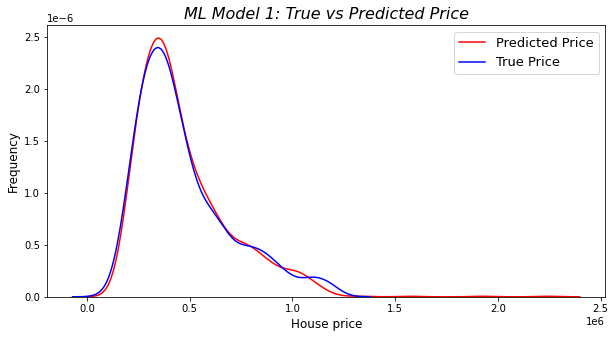

In [231]:
## Visualise True values versus Predicted Values 
fig = plt.figure(figsize=(10,5))
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Price')
sns.distplot(y_test, hist = False, color = 'b', label = 'True Price')
plt.title('NN Model 1: True vs Predicted Price', fontsize = 16, style='italic')
plt.xlabel('House price', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 13)

## save image
plt.savefig('NN Model 1: True vs Predicted Price.png', dpi=300, bbox_inches='tight')

#### Model 2: Deep Learing Regression

In [94]:
## build second model

## set seed for weights initializagtion 
np.random.seed(2021)

## build DL Model 
model2 = Sequential()

model2.add(Dense(45, input_shape=[44] ,activation='relu'))
model2.add(Dense(45,activation='relu'))
model2.add(Dense(45,activation='relu'))
model2.add(Dense(45,activation='relu'))
model2.add(Dense(1))

model2.compile(optimizer='Adam',
               loss='mse')



In [95]:
model2.fit(x=X_train, y=y_train,
           validation_data=(X_test,y_test),
           verbose=True,
           batch_size=5,
           epochs=200)

model2.summary()

Epoch 1/200
1208/1208 [==============================] - 1s 931us/step - loss: 77239033856.0000 - val_loss: 14001595392.0000
Epoch 2/200
1208/1208 [==============================] - 1s 715us/step - loss: 10667636736.0000 - val_loss: 10604817408.0000
Epoch 3/200
1208/1208 [==============================] - 1s 703us/step - loss: 8063218688.0000 - val_loss: 9612782592.0000
Epoch 4/200
1208/1208 [==============================] - 1s 709us/step - loss: 6923547136.0000 - val_loss: 8840627200.0000
Epoch 5/200
1208/1208 [==============================] - 1s 711us/step - loss: 6125453312.0000 - val_loss: 8399300608.0000
Epoch 6/200
1208/1208 [==============================] - 1s 711us/step - loss: 5586872320.0000 - val_loss: 8171538944.0000
Epoch 7/200
1208/1208 [==============================] - 1s 709us/step - loss: 5189835776.0000 - val_loss: 7958706176.0000
Epoch 8/200
1208/1208 [==============================] - 1s 712us/step - loss: 4938509824.0000 - val_loss: 7782034432.0000
Epoch 9/200


<AxesSubplot:title={'center':'Model 2: Loss vs. Validation Loss'}>

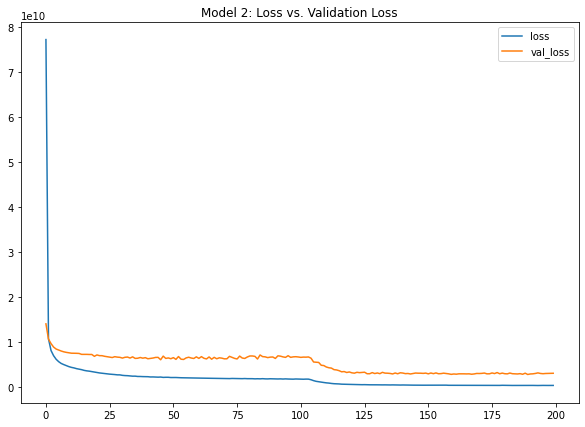

In [96]:
loss_df2 = pd.DataFrame(model2.history.history)
loss_df2.plot(figsize=(10,7), title='Model 2: Loss vs. Validation Loss')

In [97]:
y_pred2 = model2.predict(X_test)

In [98]:
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred2)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred2)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred2))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred2)))

Mean Absolute Error: 16966.10
Mean Squared Error: 3011290624.63
Root Mean Squared Error: 54875.23
Variance score is: 0.94


/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


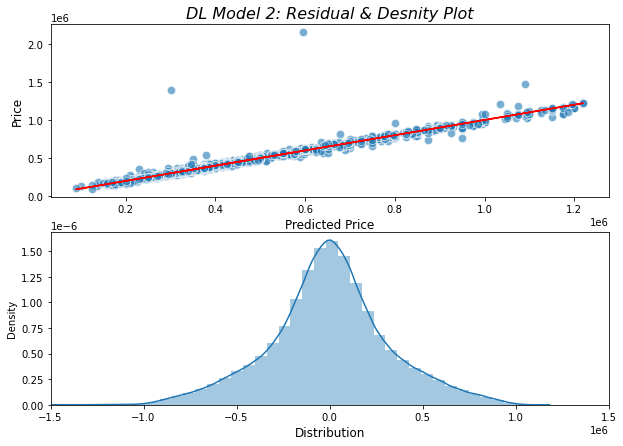

In [232]:
## Sanity checking model predictions
fig = plt.figure(figsize=(10,7))
## scatterplot 
fig.add_subplot(2,1,1)
plt.title('NN Model 2: Residual & Desnity Plot', fontsize=16, style = 'italic')
plt.scatter(y_test, y_pred2, alpha=.6, s=70, edgecolor = 'white')
plt.xlabel('Predicted Price', fontsize = 12)
plt.ylabel('Price', fontsize = 12)
# Perfect predictions
plt.plot(y_test,y_test,'r')

## densityplot
fig.add_subplot(2,1,2)
residuals = (y_test - y_pred2)
sns.distplot(residuals)
plt.xlabel('Distribution', fontsize = 12)
plt.xlim([-1500000, 1500000])

## save image
plt.savefig('NN Model 2: Residual & Desnity Plot.png', dpi=300, bbox_inches='tight')

/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


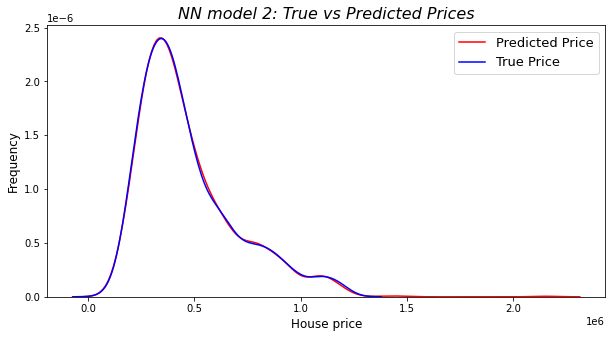

In [236]:
## Visualise True values versus Predicted Values 
fig = plt.figure(figsize=(10,5))
sns.distplot(y_pred2, hist = False, color = 'r', label = 'Predicted Price')
sns.distplot(y_test, hist = False, color = 'b', label = 'True Price')
plt.title('NN model 2: True vs Predicted Prices', fontsize = 16, style='italic')
plt.xlabel('House price', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 13)

## save image
plt.savefig('NN model 2: True vs Predicted Prices.png', dpi=300, bbox_inches='tight')

#### Model 3: Deep Learning Regressor (L1 Regularisation)

In [145]:
## 3th model (with regularization and optimizer)

## set seed for weights initializagtion 
np.random.seed(2021)

## L1 regularization 
regularizer = tf.keras.regularizers.l1(0.01)

## Build model
model3 = Sequential()

model3.add(Dense(45, input_shape=[44] ,activation='relu', kernel_regularizer=regularizer ))
model3.add(Dense(30,activation='relu', kernel_regularizer=regularizer))
model3.add(Dense(20,activation='relu', kernel_regularizer=regularizer))
model3.add(Dense(1))

model3.compile(optimizer='adam',
               loss='mse')


In [146]:
model3.fit(x=X_train, y=y_train,
           validation_data=(X_test,y_test),
           verbose=True,
           batch_size=5,
           epochs=200)

model3.summary()

Epoch 1/200
1208/1208 [==============================] - 1s 745us/step - loss: 180693549056.0000 - val_loss: 32479092736.0000
Epoch 2/200
1208/1208 [==============================] - 1s 677us/step - loss: 24055695360.0000 - val_loss: 18051418112.0000
Epoch 3/200
1208/1208 [==============================] - 1s 670us/step - loss: 14941474816.0000 - val_loss: 13281415168.0000
Epoch 4/200
1208/1208 [==============================] - 1s 680us/step - loss: 11004821504.0000 - val_loss: 11203851264.0000
Epoch 5/200
1208/1208 [==============================] - 1s 674us/step - loss: 9068884992.0000 - val_loss: 10114174976.0000
Epoch 6/200
1208/1208 [==============================] - 1s 670us/step - loss: 7976576512.0000 - val_loss: 9479071744.0000
Epoch 7/200
1208/1208 [==============================] - 1s 675us/step - loss: 7262158336.0000 - val_loss: 9158246400.0000
Epoch 8/200
1208/1208 [==============================] - 1s 686us/step - loss: 6765451264.0000 - val_loss: 8919274496.0000
Epoch 

<AxesSubplot:title={'center':'Model 3: Loss vs. Validation Loss'}>

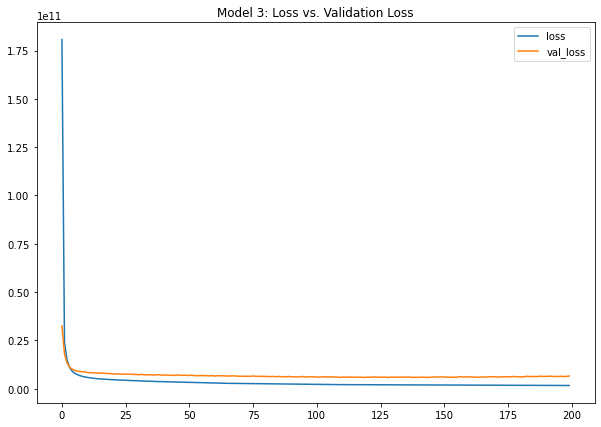

In [147]:
loss_df3 = pd.DataFrame(model3.history.history)
loss_df3.plot(figsize=(10,7), title = 'Model 3: Loss vs. Validation Loss')

In [148]:
y_pred3 = model3.predict(X_test)

In [149]:
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred3)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred3)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred3))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred3)))

Mean Absolute Error: 32633.72
Mean Squared Error: 6527610936.01
Root Mean Squared Error: 80793.63
Variance score is: 0.88


/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


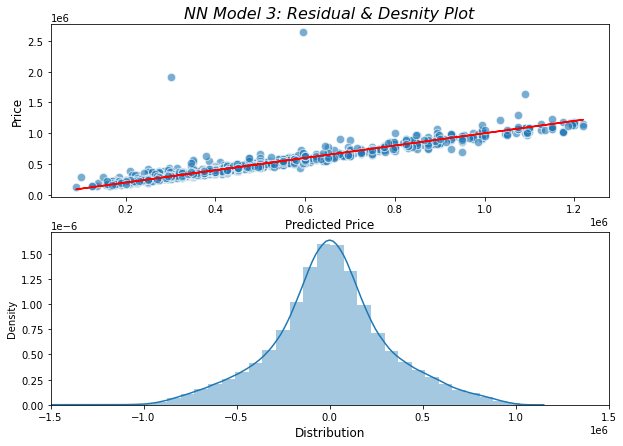

In [235]:
## Sanity checking model predictions
fig = plt.figure(figsize=(10,7))
## scatterplot 
fig.add_subplot(2,1,1)
plt.title('NN Model 3: Residual & Desnity Plot', fontsize=16, style = 'italic')
plt.scatter(y_test, y_pred3, alpha=.6, s=70, edgecolor = 'white')
plt.xlabel('Predicted Price', fontsize = 12)
plt.ylabel('Price', fontsize = 12)
# Perfect predictions
plt.plot(y_test,y_test,'r')

## densityplot
fig.add_subplot(2,1,2)
residuals = (y_test - y_pred3)
sns.distplot(residuals)
plt.xlabel('Distribution', fontsize = 12)
plt.xlim([-1500000, 1500000])

## save image
plt.savefig('NN Model 3: Residual & Desnity Plot.png', dpi=300, bbox_inches='tight')

/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


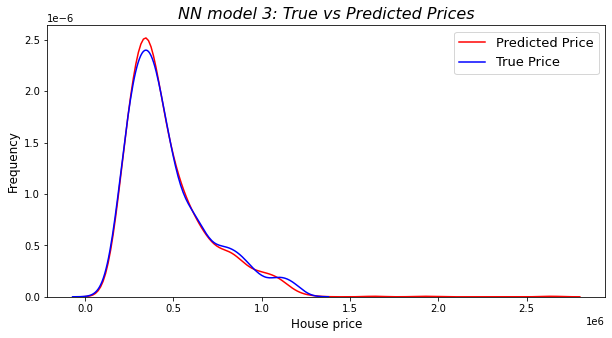

In [237]:
## Visualise True values versus Predicted Values 
fig = plt.figure(figsize=(10,5))
sns.distplot(y_pred3, hist = False, color = 'r', label = 'Predicted Price')
sns.distplot(y_test, hist = False, color = 'b', label = 'True Price')
plt.title('NN model 3: True vs Predicted Prices', fontsize = 16, style = 'italic')
plt.xlabel('House price', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 13)

## save image
plt.savefig('NN model 3: True vs Predicted Prices.png', dpi=300, bbox_inches='tight')

#### ANN Models 1, 2 and 3 With COVID-19 Features

In [119]:
## Model 1 (Baseline model) with COVID-19 Features

## set seed for weights initializagtion 
np.random.seed(2021)

## Build Model 
model1_C19 = Sequential()

model1_C19.add(Dense(48, input_shape=[47],activation='relu'))
model1_C19.add(Dense(48,activation='relu'))
model1_C19.add(Dense(1))

model1_C19.compile(optimizer='Adam',
              loss='mse')


In [120]:
## fit the model
model1_C19.fit(x=X_c_train, y=y_c_train,
          validation_data=(X_c_test,y_c_test),
          verbose=True,
          batch_size=5,
          epochs=200)

model1_C19.summary()

Epoch 1/200
1208/1208 [==============================] - 1s 852us/step - loss: 268803080192.0000 - val_loss: 240819896320.0000
Epoch 2/200
1208/1208 [==============================] - 1s 629us/step - loss: 183238459392.0000 - val_loss: 115624828928.0000
Epoch 3/200
1208/1208 [==============================] - 1s 640us/step - loss: 70299475968.0000 - val_loss: 41210339328.0000
Epoch 4/200
1208/1208 [==============================] - 1s 652us/step - loss: 33604124672.0000 - val_loss: 28104775680.0000
Epoch 5/200
1208/1208 [==============================] - 1s 651us/step - loss: 25776361472.0000 - val_loss: 22788231168.0000
Epoch 6/200
1208/1208 [==============================] - 1s 651us/step - loss: 20895365120.0000 - val_loss: 18976073728.0000
Epoch 7/200
1208/1208 [==============================] - 1s 653us/step - loss: 17319667712.0000 - val_loss: 16197496832.0000
Epoch 8/200
1208/1208 [==============================] - 1s 660us/step - loss: 14722852864.0000 - val_loss: 14211209216.0

<AxesSubplot:title={'center':'Model 1 (With COVID-19): Loss vs. Validation Loss'}>

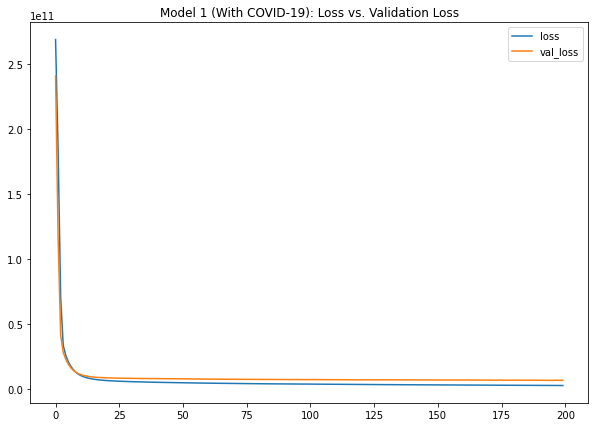

In [121]:
loss_df1_C19 = pd.DataFrame(model1_C19.history.history)
loss_df1_C19.plot(figsize=(10,7), title='Model 1 (With COVID-19): Loss vs. Validation Loss')

In [122]:
y_pred1_C19 = model1_C19.predict(X_c_test)

In [123]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_c_test,y_pred1_C19)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_c_test, y_pred1_C19)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_c_test, y_pred1_C19))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_c_test,y_pred1_C19)))

Mean Absolute Error: 36093.52
Mean Squared Error: 6604710667.49
Root Mean Squared Error: 81269.37
Variance score is: 0.87


In [179]:
## conduct a T-test to look for significant difference  
import scipy.stats as stats
print(y_pred.mean())
print(y_pred1_C19.mean())

stats.ttest_1samp(a = y_pred, popmean = y_pred1_C19.mean())

470856.4
471232.56


Ttest_1sampResult(statistic=array([-0.06476725], dtype=float32), pvalue=array([0.9483679]))

In [125]:
print(np.std(y_pred))
print(np.std(y_pred1_C19))

225609.53
225142.61


/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


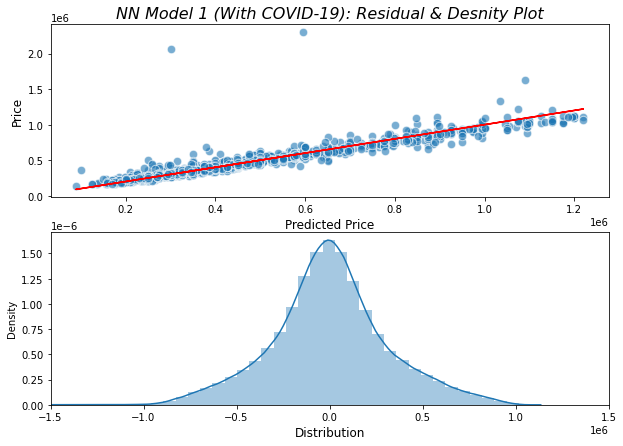

In [238]:
## Sanity checking model predictions
fig = plt.figure(figsize=(10,7))

## scatterplot 
fig.add_subplot(2,1,1)
plt.title('NN Model 1 (With COVID-19): Residual & Desnity Plot', fontsize = 16, style='italic')
plt.scatter(y_c_test, y_pred1_C19, alpha=.6, s=70, edgecolor = 'white')
plt.xlabel('Predicted Price', fontsize = 12)
plt.ylabel('Price', fontsize = 12)
# Perfect predictions
plt.plot(y_c_test,y_c_test,'r')

## densityplot
fig.add_subplot(2,1,2)
residuals = (y_c_test - y_pred1_C19)
sns.distplot(residuals)
plt.xlabel('Distribution', fontsize = 12)
plt.xlim([-1500000, 1500000])

## save image
plt.savefig('NN Model 1 (With COVID-19): Residual & Desnity Plot.png', dpi=300, bbox_inches='tight')

/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


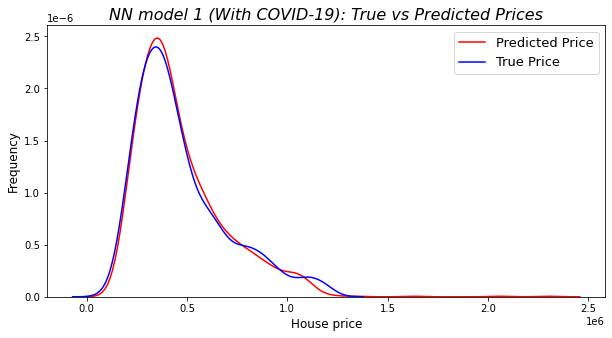

In [239]:
## Visualise True values versus Predicted Values 
fig = plt.figure(figsize=(10,5))
sns.distplot(y_pred1_C19, hist = False, color = 'r', label = 'Predicted Price')
sns.distplot(y_c_test, hist = False, color = 'b', label = 'True Price')
plt.title('NN model 1 (With COVID-19): True vs Predicted Prices', fontsize = 16, style='italic')
plt.xlabel('House price', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 13)

## save image
plt.savefig('NN model 1 (With COVID-19): True vs Predicted Prices.png', dpi=300, bbox_inches='tight')

In [129]:
## Model 2 with COVID-19 features

## set seed for weights initializagtion 
np.random.seed(2021)

## Build model
model2_C19 = Sequential()

model2_C19.add(Dense(48, input_shape=[47] ,activation='relu'))
model2_C19.add(Dense(48,activation='relu'))
model2_C19.add(Dense(48,activation='relu'))
model2_C19.add(Dense(48,activation='relu'))
model2_C19.add(Dense(1))

model2_C19.compile(optimizer='Adam',
                   loss='mse')



In [130]:
model2_C19.fit(x=X_c_train, y=y_c_train,
               validation_data=(X_c_test,y_c_test),
               verbose=True,
               batch_size=5,
               epochs=200)

model2_C19.summary()

Epoch 1/200
1208/1208 [==============================] - 1s 773us/step - loss: 73369255936.0000 - val_loss: 12187258880.0000
Epoch 2/200
1208/1208 [==============================] - 1s 732us/step - loss: 9460171776.0000 - val_loss: 10015713280.0000
Epoch 3/200
1208/1208 [==============================] - 1s 715us/step - loss: 7701933568.0000 - val_loss: 9795453952.0000
Epoch 4/200
1208/1208 [==============================] - 1s 714us/step - loss: 6804206080.0000 - val_loss: 9477239808.0000
Epoch 5/200
1208/1208 [==============================] - 1s 722us/step - loss: 6171483648.0000 - val_loss: 9068037120.0000
Epoch 6/200
1208/1208 [==============================] - 1s 725us/step - loss: 5635063808.0000 - val_loss: 8513634304.0000
Epoch 7/200
1208/1208 [==============================] - 1s 720us/step - loss: 5212139520.0000 - val_loss: 8169160704.0000
Epoch 8/200
1208/1208 [==============================] - 1s 731us/step - loss: 4851103744.0000 - val_loss: 8327700480.0000
Epoch 9/200
1

<AxesSubplot:title={'center':'Model 2 (With COVID-19): Loss vs. Validation Loss'}>

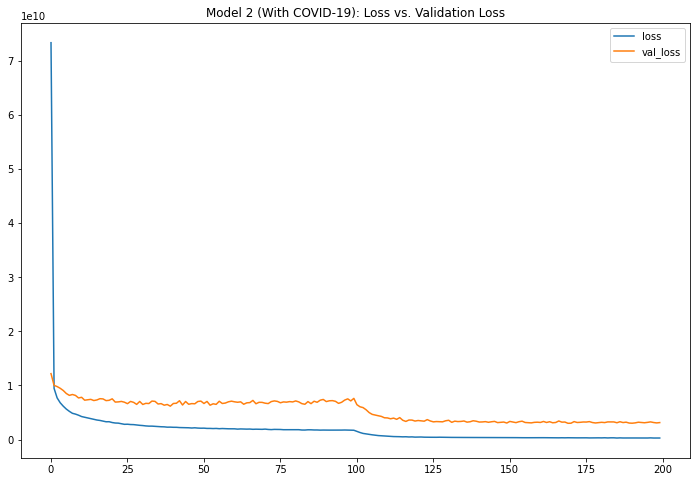

In [131]:
C19_loss_df = pd.DataFrame(model2_C19.history.history)
C19_loss_df.plot(figsize=(10,7), title='Model 2 (With COVID-19): Loss vs. Validation Loss')

In [132]:
y_pred2_C19 = model2_C19.predict(X_c_test)

In [133]:
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_c_test, y_pred2_C19)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_c_test, y_pred2_C19)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_c_test, y_pred2_C19))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_c_test,y_pred2_C19)))

Mean Absolute Error: 17191.69
Mean Squared Error: 3137114261.99
Root Mean Squared Error: 56009.95
Variance score is: 0.94


In [178]:
## conduct a T-test on Models 2 performances 
import scipy.stats as stats
print(y_pred2.mean())
print(y_pred2_C19.mean())

stats.ttest_1samp(a = y_pred2, popmean = y_pred2_C19.mean())

472328.34
472994.72


Ttest_1sampResult(statistic=array([-0.11111227], dtype=float32), pvalue=array([0.9115421]))

/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


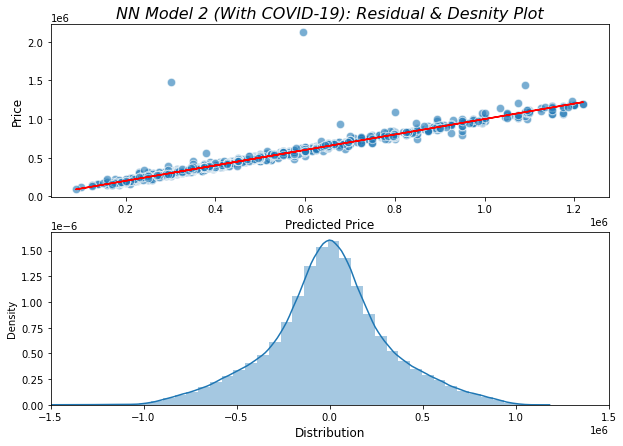

In [240]:
## Sanity checking model predictions
fig = plt.figure(figsize=(10,7))

## scatterplot 
fig.add_subplot(2,1,1)
plt.title('NN Model 2 (With COVID-19): Residual & Desnity Plot', fontsize = 16, style='italic')
plt.scatter(y_c_test, y_pred2_C19, alpha=.6, s=70, edgecolor = 'white')
plt.xlabel('Predicted Price', fontsize = 12)
plt.ylabel('Price', fontsize = 12)
# Perfect predictions
plt.plot(y_c_test,y_c_test,'r')

## densityplot
fig.add_subplot(2,1,2)
residuals = (y_c_test - y_pred2_C19)
sns.distplot(residuals)
plt.xlabel('Distribution', fontsize = 12)
plt.xlim([-1500000, 1500000])

## save image
plt.savefig('NN Model 2 (With COVID-19): Residual & Desnity Plot.png', dpi=300, bbox_inches='tight')

/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


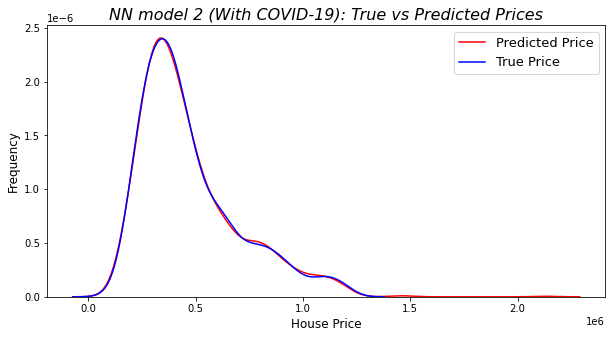

In [241]:
## Visualise True values versus Predicted Values 
fig = plt.figure(figsize=(10,5))
sns.distplot(y_pred2_C19, hist = False, color = 'r', label = 'Predicted Price')
sns.distplot(y_c_test, hist = False, color = 'b', label = 'True Price')
plt.title('NN model 2 (With COVID-19): True vs Predicted Prices', fontsize = 16, style='italic')
plt.xlabel('House Price', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 13)

## save image
plt.savefig('NN model 2 (With COVID-19): True vs Predicted Prices.png', dpi=300, bbox_inches='tight')

In [139]:
## model 3 with COVID-19

## set seed for weights initializagtion 
np.random.seed(2021)

## L1 Regularization 
regularizer = tf.keras.regularizers.l1(0.01)

## Build model
model3_C19 = Sequential()

model3_C19.add(Dense(48, input_shape=[47] ,activation='relu', kernel_regularizer=regularizer ))
model3_C19.add(Dense(23,activation='relu', kernel_regularizer=regularizer))
model3_C19.add(Dense(23,activation='relu', kernel_regularizer=regularizer))
model3_C19.add(Dense(1))

model3_C19.compile(optimizer='adam',
                   loss='mse')



In [140]:
model3_C19.fit(x=X_c_train, y=y_c_train,
           validation_data=(X_c_test,y_c_test),
           verbose=True,
           batch_size=5,
           epochs=200)

model3_C19.summary()

Epoch 1/200
1208/1208 [==============================] - 1s 741us/step - loss: 184636112896.0000 - val_loss: 32229081088.0000
Epoch 2/200
1208/1208 [==============================] - 1s 680us/step - loss: 22713737216.0000 - val_loss: 18004066304.0000
Epoch 3/200
1208/1208 [==============================] - 1s 675us/step - loss: 14402689024.0000 - val_loss: 13655017472.0000
Epoch 4/200
1208/1208 [==============================] - 1s 677us/step - loss: 10853797888.0000 - val_loss: 11398113280.0000
Epoch 5/200
1208/1208 [==============================] - 1s 670us/step - loss: 9037309952.0000 - val_loss: 10401383424.0000
Epoch 6/200
1208/1208 [==============================] - 1s 695us/step - loss: 7935951872.0000 - val_loss: 9778972672.0000
Epoch 7/200
1208/1208 [==============================] - 1s 696us/step - loss: 7210674688.0000 - val_loss: 9487136768.0000
Epoch 8/200
1208/1208 [==============================] - 1s 684us/step - loss: 6678996992.0000 - val_loss: 9272890368.0000
Epoch 

<AxesSubplot:title={'center':'Model 3 (With COVID-19): Loss vs. Validation Loss'}>

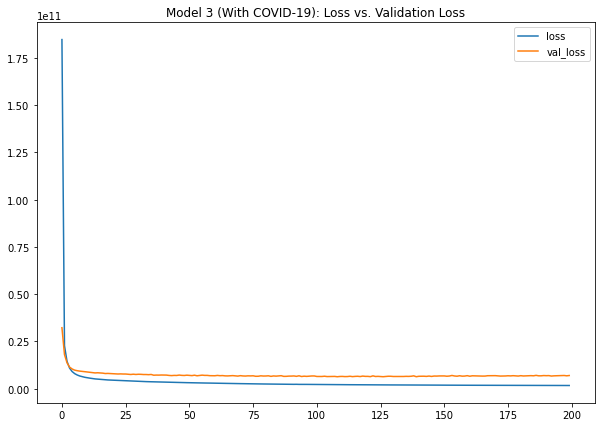

In [141]:
C19_loss_df3 = pd.DataFrame(model3_C19.history.history)
C19_loss_df3.plot(figsize=(10,7), title='Model 3 (With COVID-19): Loss vs. Validation Loss')

In [142]:
y_predC19_3 = model3_C19.predict(X_c_test) ## wel beter dan orginele

In [143]:
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_c_test, y_predC19_3)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_c_test, y_predC19_3)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_c_test, y_predC19_3))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_c_test,y_predC19_3)))

Mean Absolute Error: 32072.51
Mean Squared Error: 6936303232.57
Root Mean Squared Error: 83284.47
Variance score is: 0.87


Ttest_indResult(statistic=array([-0.56613296], dtype=float32), pvalue=array([0.57134549]))

/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


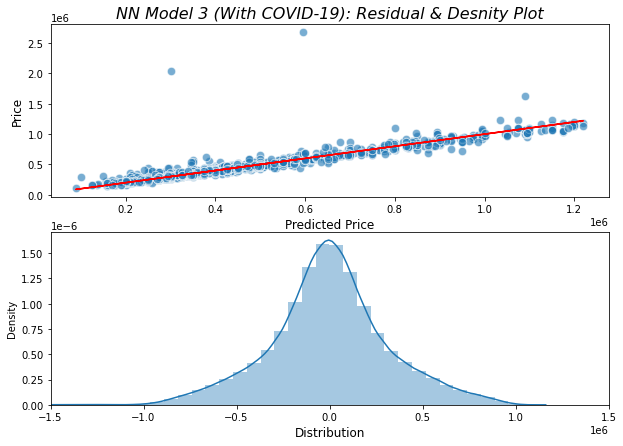

In [242]:
## Sanity checking model predictions
fig = plt.figure(figsize=(10,7))
## scatterplot 
fig.add_subplot(2,1,1)
plt.title('NN Model 3 (With COVID-19): Residual & Desnity Plot', fontsize = 16, style='italic')
plt.scatter(y_c_test, y_predC19_3, alpha=.6, s=70, edgecolor = 'white')
plt.xlabel('Predicted Price', fontsize = 12)
plt.ylabel('Price', fontsize = 12)
# Perfect predictions
plt.plot(y_c_test,y_c_test,'r')

## densityplot
fig.add_subplot(2,1,2)
residuals = (y_c_test - y_predC19_3)
sns.distplot(residuals)
plt.xlabel('Distribution', fontsize = 12)
plt.xlim([-1500000, 1500000])

## save image
plt.savefig('NN Model 3 (With COVID-19): Residual & Desnity Plot.png', dpi=300, bbox_inches='tight')

/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


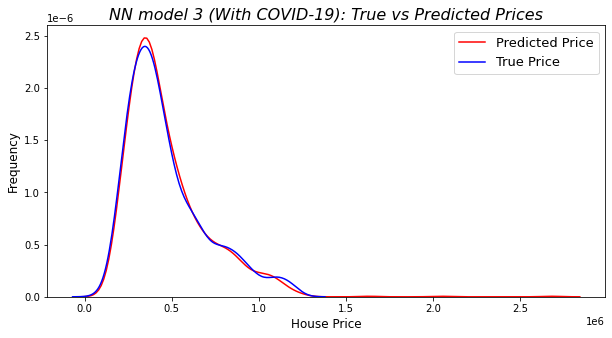

In [243]:
## Visualise True values versus Predicted Values 
fig = plt.figure(figsize=(10,5))
sns.distplot(y_predC19_3, hist = False, color = 'r', label = 'Predicted Price')
sns.distplot(y_c_test, hist = False, color = 'b', label = 'True Price')
plt.title('NN model 3 (With COVID-19): True vs Predicted Prices', fontsize = 16, style='italic')
plt.xlabel('House Price', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 13)

## save image
plt.savefig('NN model 3 (With COVID-19): True vs Predicted Prices.png', dpi=300, bbox_inches='tight')

## Hypothses testing

In [187]:
## Two-sample T-test
import scipy.stats as stats
import math

In [192]:
## conduct a T-test on MLR Models performances
print(y_pred_MLR.mean())
print(y_pred_MLR_C19.mean())
stats.ttest_ind(a=y_pred_MLR, b=y_pred_MLR_C19, equal_var=False)

471557.59507899126
471579.8912806715


Ttest_indResult(statistic=-0.0028219660423134873, pvalue=0.9977485863597013)

In [202]:
## Calculate sigma
sigma = y_pred_MLR.std()/math.sqrt(1510)  # Sample stdev/sample size

## Calculate confidence interval (95%)
stats.t.interval(0.95,                       
                 df = 1509,                    
                 loc = y_pred_MLR.mean(),        
                 scale= sigma)           

(460604.16244288604, 482511.0277150965)

In [193]:
## conduct a T-test on Models 1 performances
print(y_pred.mean())
print(y_pred1_C19.mean())
stats.ttest_ind(a=y_pred, b=y_pred1_C19, equal_var=False)

470856.4
471232.56


Ttest_indResult(statistic=array([-0.04584478], dtype=float32), pvalue=array([0.963437]))

In [203]:
## Calculate sigma
sigma1 = y_pred.std()/math.sqrt(1510)  # Sample stdev/sample size

## Calculate confidence interval (95%)
stats.t.interval(0.95,                       
                 df = 1509,                    
                 loc = y_pred.mean(),        
                 scale= sigma1)           

(459467.9320585512, 482244.8804414488)

In [194]:
## conduct a T-test on Models 2 performances
print(y_pred2.mean())
print(y_pred2_C19.mean())
stats.ttest_ind(a=y_pred2, b=y_pred2_C19, equal_var=False)

472328.34
472994.72


Ttest_indResult(statistic=array([-0.07816397], dtype=float32), pvalue=array([0.9377028]))

In [204]:
## Calculate sigma
sigma2 = y_pred2.std()/math.sqrt(1510)  # Sample stdev/sample size

## Calculate confidence interval (95%)
stats.t.interval(0.95,                       
                 df = 1509,                    
                 loc = y_pred2.mean(),        
                 scale= sigma2)           

(460568.28801450966, 484088.39948549034)

In [195]:
## conduct a T-test on Models 3 performances
print(y_pred3.mean())
print(y_predC19_3.mean())
stats.ttest_ind(a=y_pred3, b=y_predC19_3, equal_var=False)

468142.16
472936.84


Ttest_indResult(statistic=array([-0.56613296], dtype=float32), pvalue=array([0.57134549]))

In [201]:
## Calculate sigma
sigma3 = y_pred3.std()/math.sqrt(1510)  # Sample stdev/sample size

## Calculate confidence interval (95%)
stats.t.interval(0.95,                       
                 df = 1509,                    
                 loc = y_pred3.mean(),        
                 scale= sigma3)                

(456408.3470685095, 479875.9654314905)

## Visualize Outcomes

In [155]:
## Store All performance metrics

## MLR Model (Baseline)
MAE_MLR = metrics.mean_absolute_error(y_test, y_pred_MLR)
MSE_MLR = metrics.mean_squared_error(y_test, y_pred_MLR)
RMSE_MLR = np.sqrt(metrics.mean_squared_error(y_test, y_pred_MLR))
Accuracy_MLR = (metrics.explained_variance_score(y_test, y_pred_MLR)*100)

## MLR Model With COVID-19
MAE_MLR_C19 = metrics.mean_absolute_error(y_c_test, y_pred_MLR_C19)
MSE_MLR_C19 = metrics.mean_squared_error(y_c_test, y_pred_MLR_C19)
RMSE_MLR_C19 = np.sqrt(metrics.mean_squared_error(y_c_test, y_pred_MLR_C19))
Accuracy_MLR_C19 = (metrics.explained_variance_score(y_c_test, y_pred_MLR_C19)*100)

## ANN Model 1 (Baseline)
MAE_M1 = metrics.mean_absolute_error(y_test, y_pred)
MSE_M1 = metrics.mean_squared_error(y_test, y_pred)
RMSE_M1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
Accuracy_M1 = (metrics.explained_variance_score(y_test, y_pred)*100)

## ANN Model 2
MAE_M2 = metrics.mean_absolute_error(y_test, y_pred2)
MSE_M2 = metrics.mean_squared_error(y_test, y_pred2)
RMSE_M2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred2))
Accuracy_M2 = (metrics.explained_variance_score(y_test, y_pred2)*100)

## ANN Model 3
MAE_M3 = metrics.mean_absolute_error(y_test, y_pred3)
MSE_M3 = metrics.mean_squared_error(y_test, y_pred3)
RMSE_M3 = np.sqrt(metrics.mean_squared_error(y_test, y_pred3))
Accuracy_M3 = (metrics.explained_variance_score(y_test, y_pred3)*100)

## Model 1 With COVID-19
MAE_M1_C19 = metrics.mean_absolute_error(y_c_test, y_pred1_C19)
MSE_M1_C19 = metrics.mean_squared_error(y_c_test, y_pred1_C19)
RMSE_M1_C19 = np.sqrt(metrics.mean_squared_error(y_c_test, y_pred1_C19))
Accuracy_M1_C19 = (metrics.explained_variance_score(y_c_test,y_pred1_C19)*100)

## Model 2 With COVID-19
MAE_M2_C19 = metrics.mean_absolute_error(y_c_test, y_pred2_C19)
MSE_M2_C19 = metrics.mean_squared_error(y_c_test, y_pred2_C19)
RMSE_M2_C19 = np.sqrt(metrics.mean_squared_error(y_c_test, y_pred2_C19))
Accuracy_M2_C19 = (metrics.explained_variance_score(y_c_test,y_pred2_C19)*100)

## Model 3 With COVID-19
MAE_M3_C19 = metrics.mean_absolute_error(y_c_test, y_predC19_3)
MSE_M3_C19 = metrics.mean_squared_error(y_c_test, y_predC19_3)
RMSE_M3_C19 = np.sqrt(metrics.mean_squared_error(y_c_test, y_predC19_3))
Accuray_M3_C19 = (metrics.explained_variance_score(y_c_test,y_predC19_3)*100)

In [219]:
data = {'Model':['MLR', 'MLR With COVID-19', 'Model1', 'Model1 With COVID-19', 'Model2', 'Model2 With COVID-19', 'Model3', 'Model3 With COVID-19'] , 
        'MAE': [MAE_MLR, MAE_MLR_C19, MAE_M1, MAE_M1_C19, MAE_M2, MAE_M2_C19, MAE_M3, MAE_M3_C19], 
        'MSE': [MSE_MLR, MSE_MLR_C19, MSE_M1, MSE_M1_C19, MSE_M2, MSE_M2_C19, MSE_M3, MSE_M3_C19 ], 
        'RMSE':[RMSE_MLR, RMSE_MLR_C19, RMSE_M1, RMSE_M1_C19, RMSE_M2, RMSE_M2_C19, RMSE_M3, RMSE_M3_C19], 
        'R-squared':[Accuracy_MLR,Accuracy_MLR_C19, Accuracy_M1, Accuracy_M1_C19, Accuracy_M2, Accuracy_M2_C19, Accuracy_M3, Accuray_M3_C19]}
Models_Coefs_df = pd.DataFrame(data, columns = ['Model','MAE','MSE','RMSE','R-squared'])
Models_Coefs_df.head(8)

,Model,MAE,MSE,RMSE,R-squared
0,MLR,50031.212924,7.536765e+09,86814.543205,85.660046
1,MLR With COVID-19,50042.451323,7.541302e+09,86840.670117,85.651476
2,Model1,31241.991639,5.607452e+09,74882.920664,89.330135
3,Model1 With COVID-19,36093.521616,6.604711e+09,81269.371029,87.432859
4,Model2,16966.098412,3.011291e+09,54875.227787,94.274394
5,Model2 With COVID-19,17191.690268,3.137114e+09,56009.947884,94.039626
6,Model3,32633.720421,6.527611e+09,80793.631779,87.592982
7,Model3 With COVID-19,32072.511615,6.936303e+09,83284.471737,86.810053


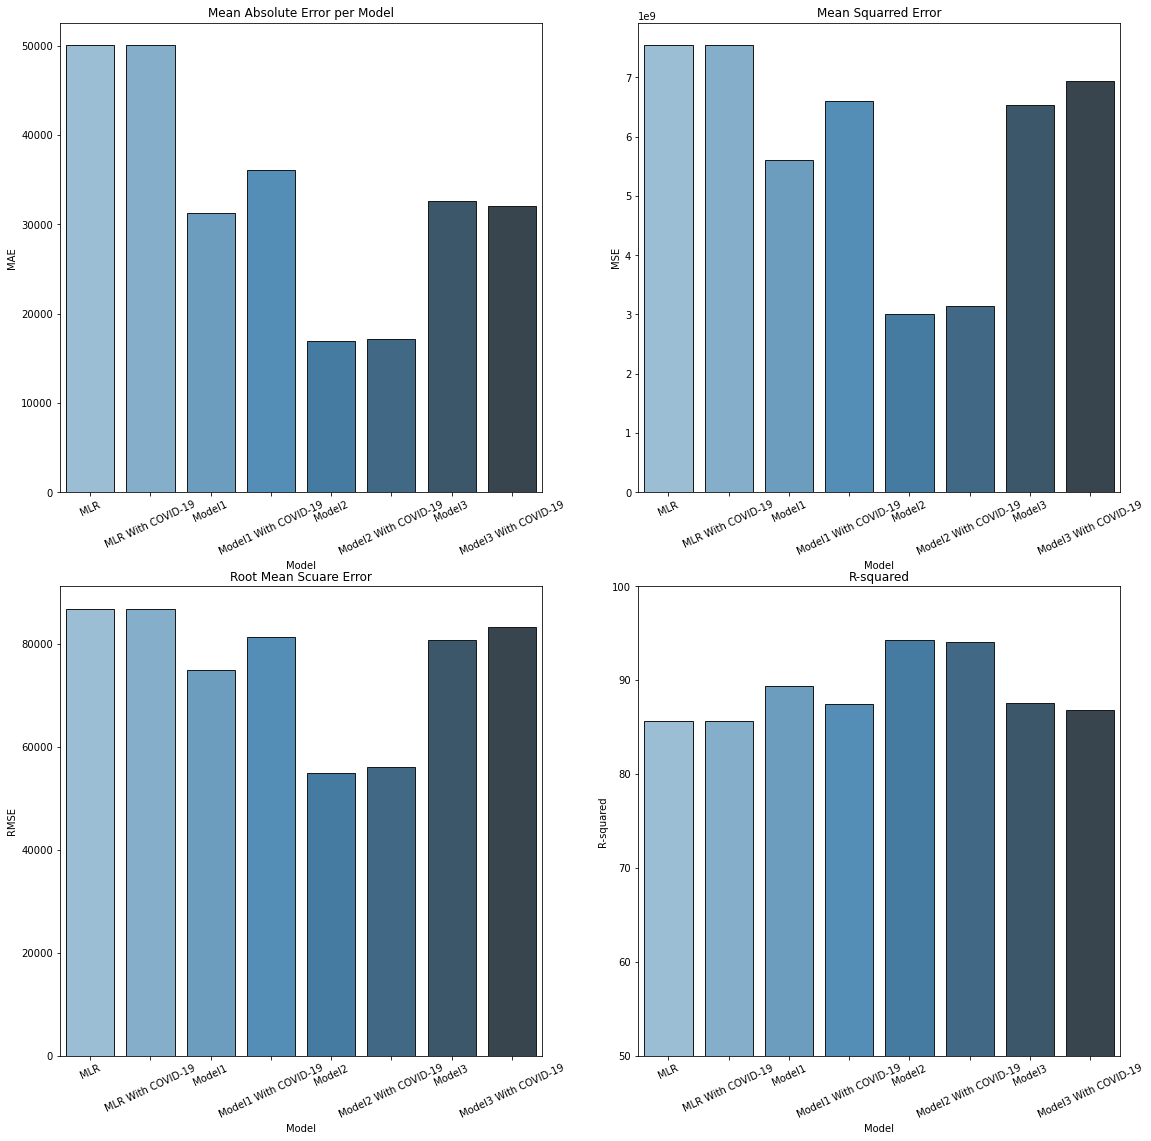

In [244]:
x = Models_Coefs_df['Model']
y = Models_Coefs_df['MAE']
y1 = Models_Coefs_df['MSE']
y2 = Models_Coefs_df['RMSE']
y3 = Models_Coefs_df['R-squared']



plt.figure(figsize = (19,19))
plt.xticks(rotation=20)
plt.title('Mean Absolute Error per Model')

plt.subplot(2,2,1)
sns.barplot(x=x, y=y, palette= 'Blues_d', edgecolor=".1")
plt.xticks(rotation=25)
plt.title("Mean Absolute Error per Model")

plt.subplot(2,2,2)
sns.barplot(x=x, y=y1, palette= "Blues_d", edgecolor=".1")
plt.xticks(rotation=25)
plt.title("Mean Squarred Error")

plt.subplot(2,2,3)
sns.barplot(x=x, y=y2, palette= "Blues_d", edgecolor=".1")
plt.xticks(rotation=25)
plt.title("Root Mean Scuare Error")


plt.subplot(2,2,4)
sns.barplot(x=x, y=y3, palette= 'Blues_d', edgecolor=".1")
plt.xticks(rotation=25)
plt.title("R-squared")
plt.ylim((50,100))

## save image
plt.savefig('ALL_model_metrics.png', dpi=300, bbox_inches='tight')

/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/daanroosendaal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

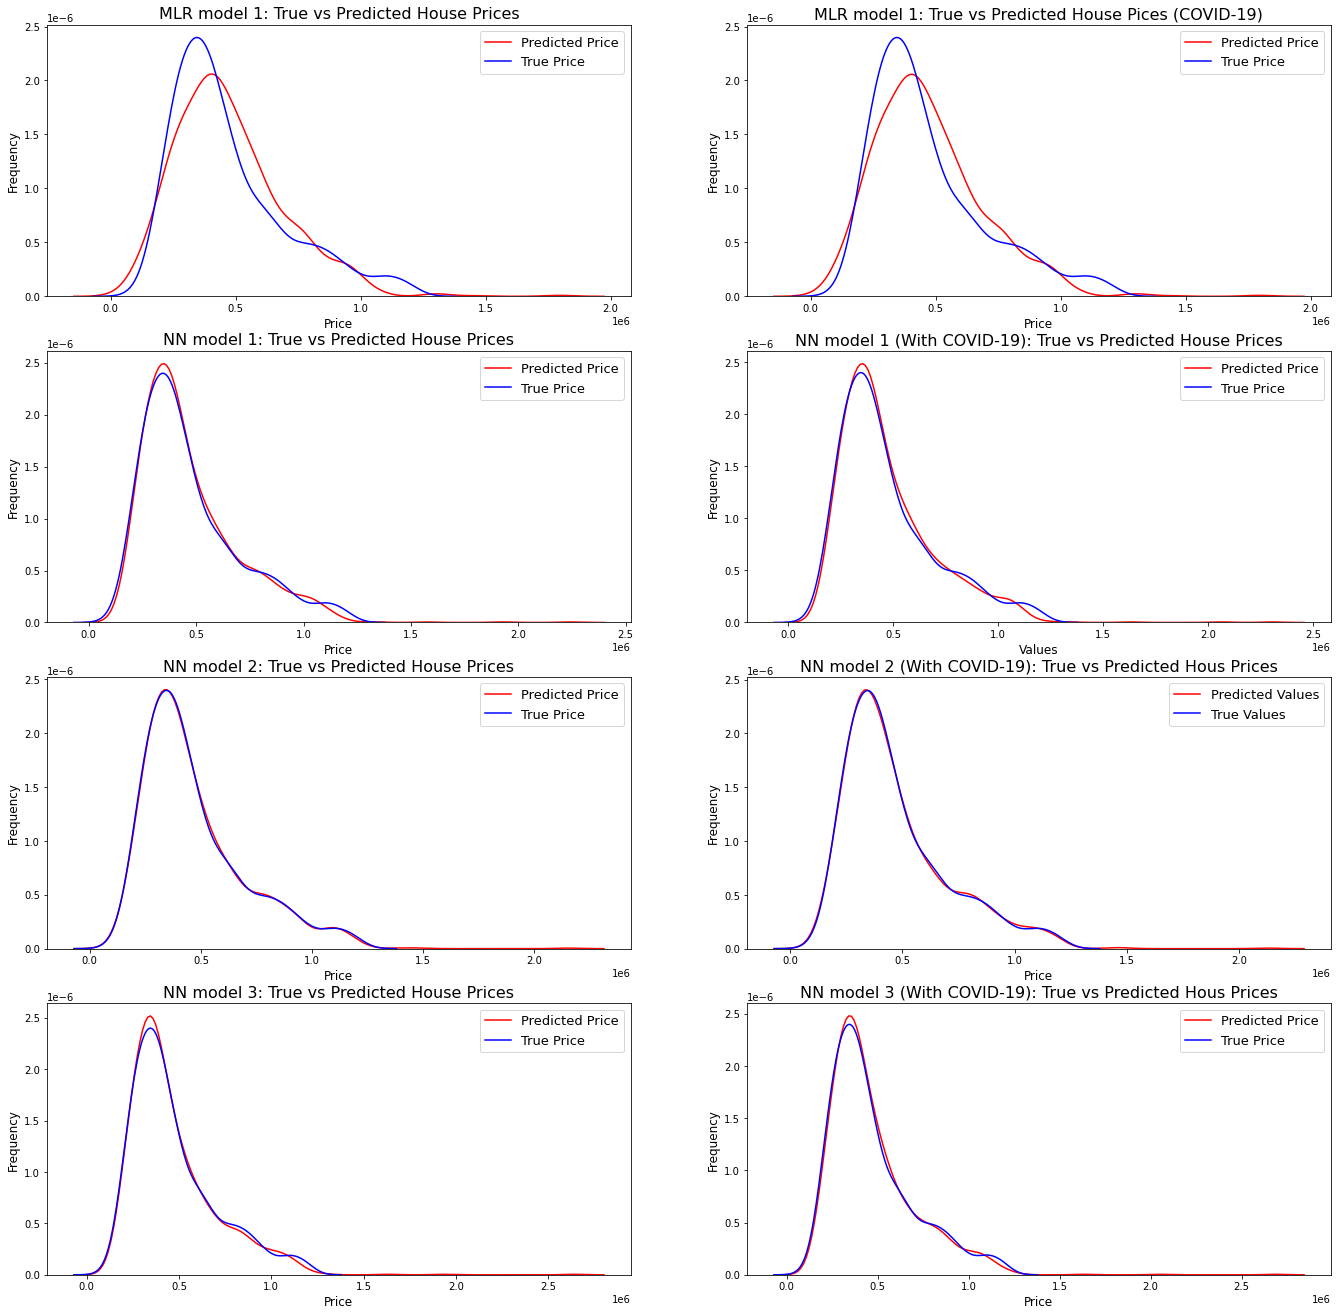

In [245]:
## plotting all predictions

plt.figure(figsize = (23,23))

plt.subplot(4,2,1) ## MLR 1
sns.distplot(y_pred_MLR, hist = False, color = 'r', label = 'Predicted Price')
sns.distplot(y_test, hist = False, color = 'b', label = 'True Price')
plt.title('MLR model 1: True vs Predicted House Prices', fontsize = 16)
plt.xlabel('Price', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 13)

plt.subplot(4,2,2) ## MLR C
sns.distplot(y_pred_MLR_C19, hist = False, color = 'r', label = 'Predicted Price')
sns.distplot(y_c_test, hist = False, color = 'b', label = 'True Price')
plt.title('MLR model 1: True vs Predicted House Pices (COVID-19)', fontsize = 16)
plt.xlabel('Price', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 13)

plt.subplot(4,2,3) ## M1
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Price')
sns.distplot(y_test, hist = False, color = 'b', label = 'True Price')
plt.title('NN model 1: True vs Predicted House Prices', fontsize = 16)
plt.xlabel('Price', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 13)

plt.subplot(4,2,4) ## M1 C
sns.distplot(y_pred1_C19, hist = False, color = 'r', label = 'Predicted Price')
sns.distplot(y_c_test, hist = False, color = 'b', label = 'True Price')
plt.title('NN model 1 (With COVID-19): True vs Predicted House Prices', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 13)

plt.subplot(4,2,5) ## M2
sns.distplot(y_pred2, hist = False, color = 'r', label = 'Predicted Price')
sns.distplot(y_test, hist = False, color = 'b', label = 'True Price')
plt.title('NN model 2: True vs Predicted House Prices', fontsize = 16)
plt.xlabel('Price', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 13)

plt.subplot(4,2,6) ## M2 C
sns.distplot(y_pred2_C19, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_c_test, hist = False, color = 'b', label = 'True Values')
plt.title('NN model 2 (With COVID-19): True vs Predicted Hous Prices', fontsize = 16)
plt.xlabel('Price', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 13)

plt.subplot(4,2,7) ## M3
sns.distplot(y_pred3, hist = False, color = 'r', label = 'Predicted Price')
sns.distplot(y_test, hist = False, color = 'b', label = 'True Price')
plt.title('NN model 3: True vs Predicted House Prices', fontsize = 16)
plt.xlabel('Price', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 13)

plt.subplot(4,2,8) ## M3 C
sns.distplot(y_predC19_3, hist = False, color = 'r', label = 'Predicted Price')
sns.distplot(y_c_test, hist = False, color = 'b', label = 'True Price')
plt.title('NN model 3 (With COVID-19): True vs Predicted Hous Prices', fontsize = 16)
plt.xlabel('Price', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 13)

## save image
plt.savefig('All_models_TrueVsPred.png', dpi=300, bbox_inches='tight')